In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
PLOT_COLOR = "#61cbf4"

In [18]:
multiome_optimal_lower_bound = 0.619193
citeseq_optimal_lower_bound = 0.844725

In [16]:
df = pd.read_csv("data/bootstrap_results.csv")
df = df[df["rank"] != 22]  # For some reason, alalysis did not work for this model
df

,public_citeseq,public_multiome,public_total_score,private_citeseq,private_multiome,private_total_score,rank
0,0.891945,0.663493,0.814675,0.845377,0.576688,0.775402,1
1,0.891350,0.664301,0.814555,0.844095,0.576739,0.774467,1
2,0.890717,0.664152,0.814086,0.844872,0.577376,0.775207,1
3,0.891187,0.663372,0.814133,0.845113,0.578865,0.775773,1
4,0.891273,0.663239,0.814144,0.844745,0.577350,0.775107,1
...,...,...,...,...,...,...,...
14995,0.890550,0.661511,0.813082,0.842162,0.564314,0.769802,50
14996,0.890927,0.661763,0.813417,0.841003,0.562765,0.768541,50
14997,0.890157,0.661742,0.812900,0.842151,0.564873,0.769939,50
14998,0.889723,0.661463,0.812518,0.842095,0.563793,0.769616,50


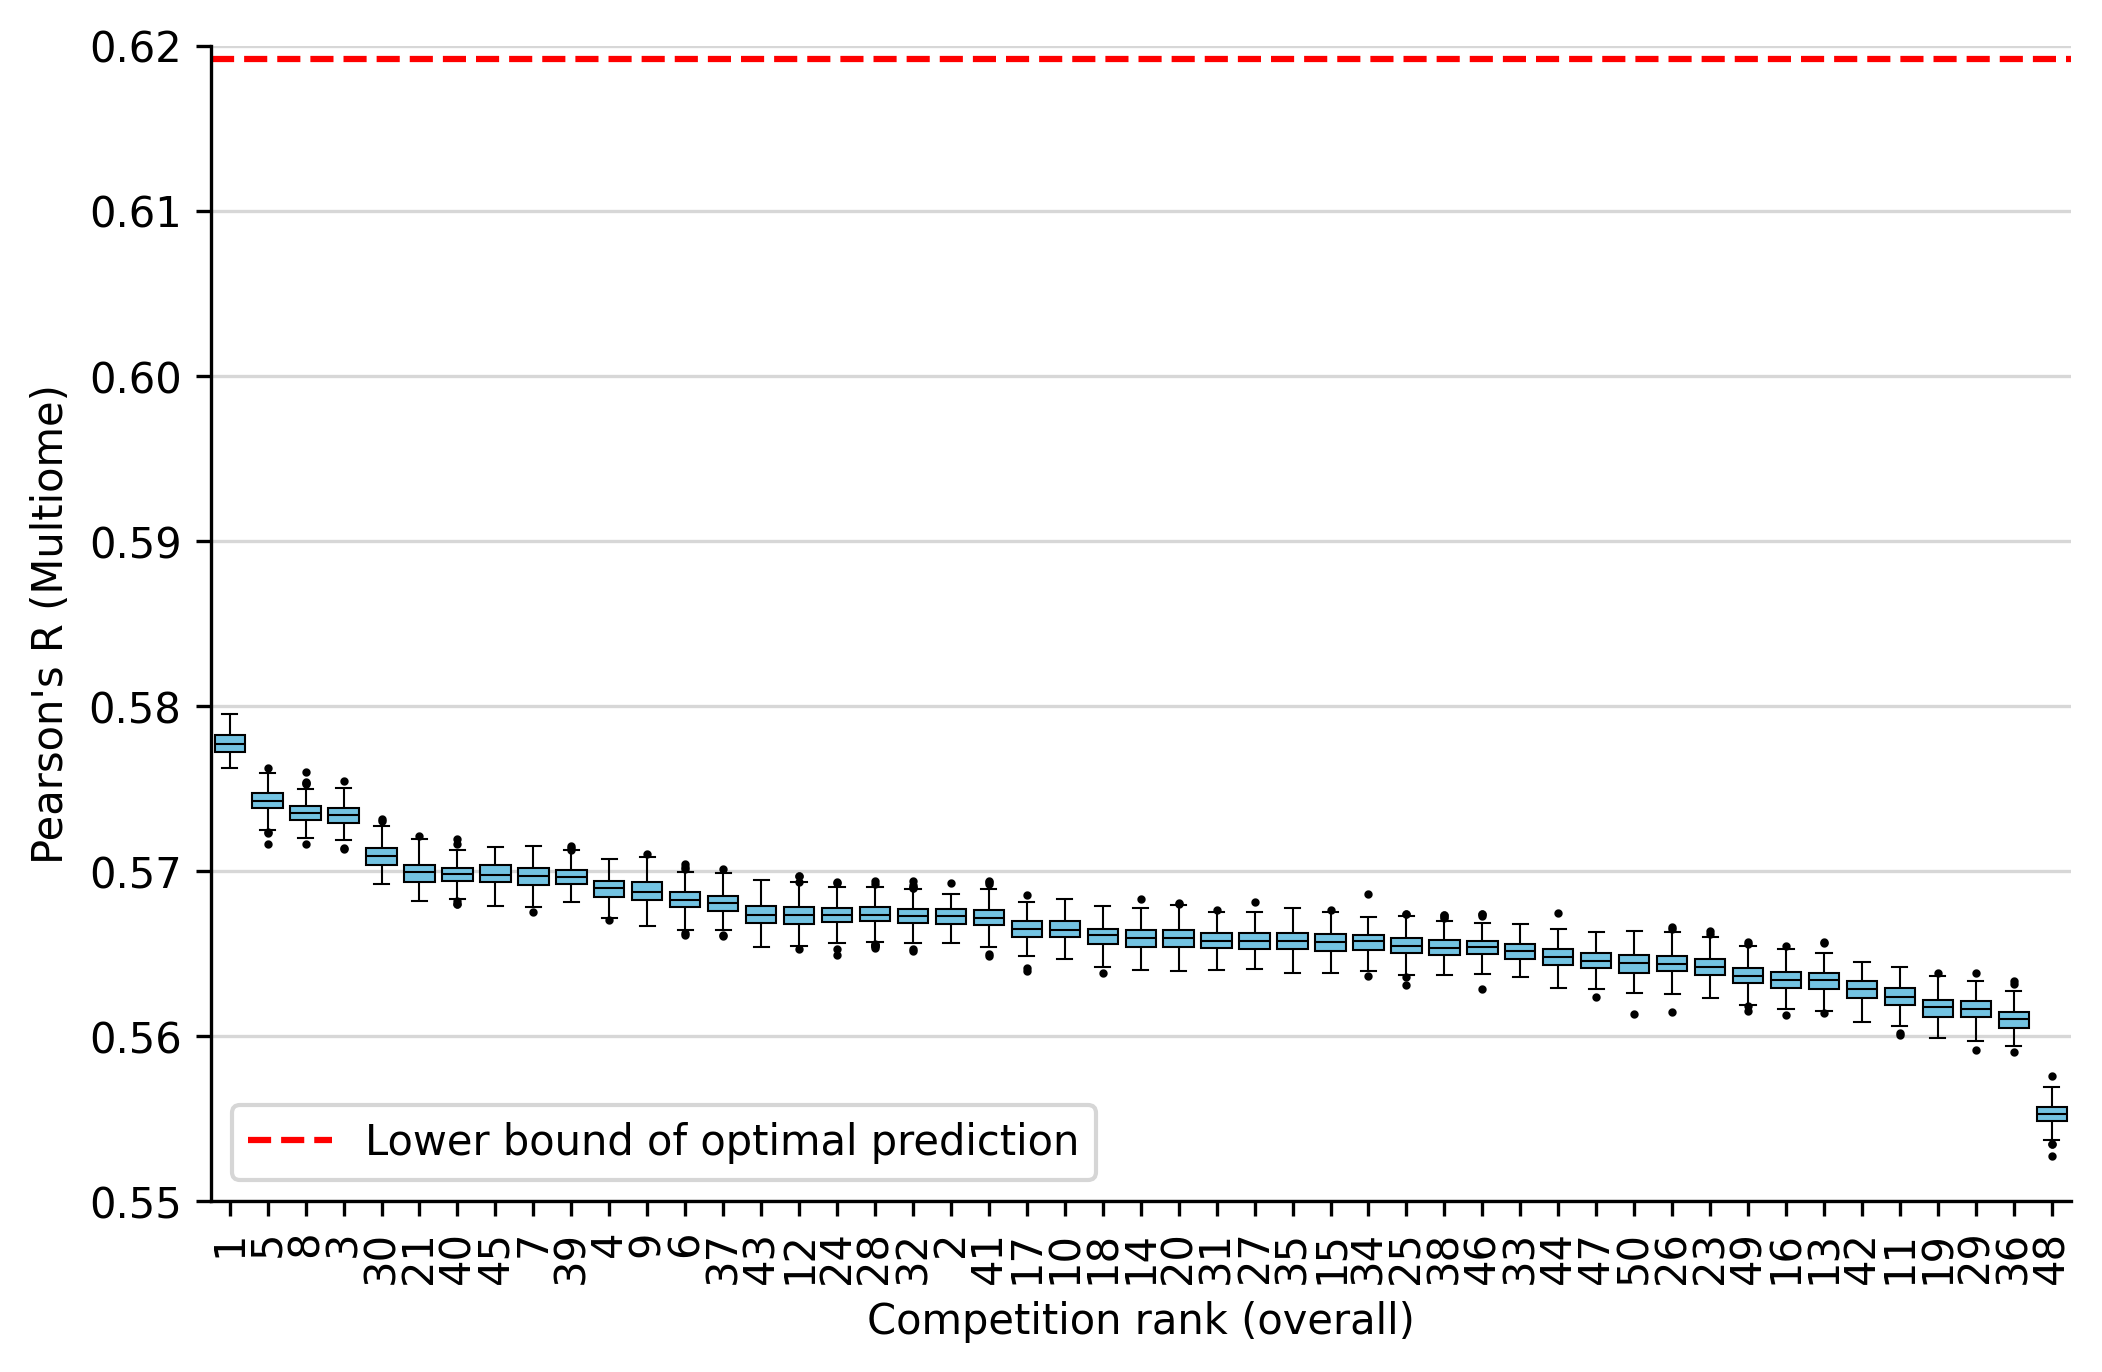

In [44]:
plt.figure(dpi=300, figsize=(8, 5))

col = "private_multiome"
order = df.groupby("rank").mean().sort_values(by=col, ascending=False).index

sns.boxplot(
    data=df,
    x="rank",
    y=col,
    order=order,
    color=PLOT_COLOR,
    linecolor="black",
    fliersize=1,
    linewidth=0.5
)

plt.axhline(y=multiome_optimal_lower_bound, color="red", linestyle="--", label="Lower bound of optimal prediction")
plt.legend(loc="lower left")

plt.ylim(0.55, 0.62)
plt.xticks(rotation=90)

plt.grid(axis="y", linestyle="-", alpha=0.5)

# Remove border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel("Competition rank (overall)")
plt.ylabel("Pearson's R (Multiome)")

plt.savefig("../figures/Fig_2_d_multiome_task_robustness.pdf", bbox_inches="tight")

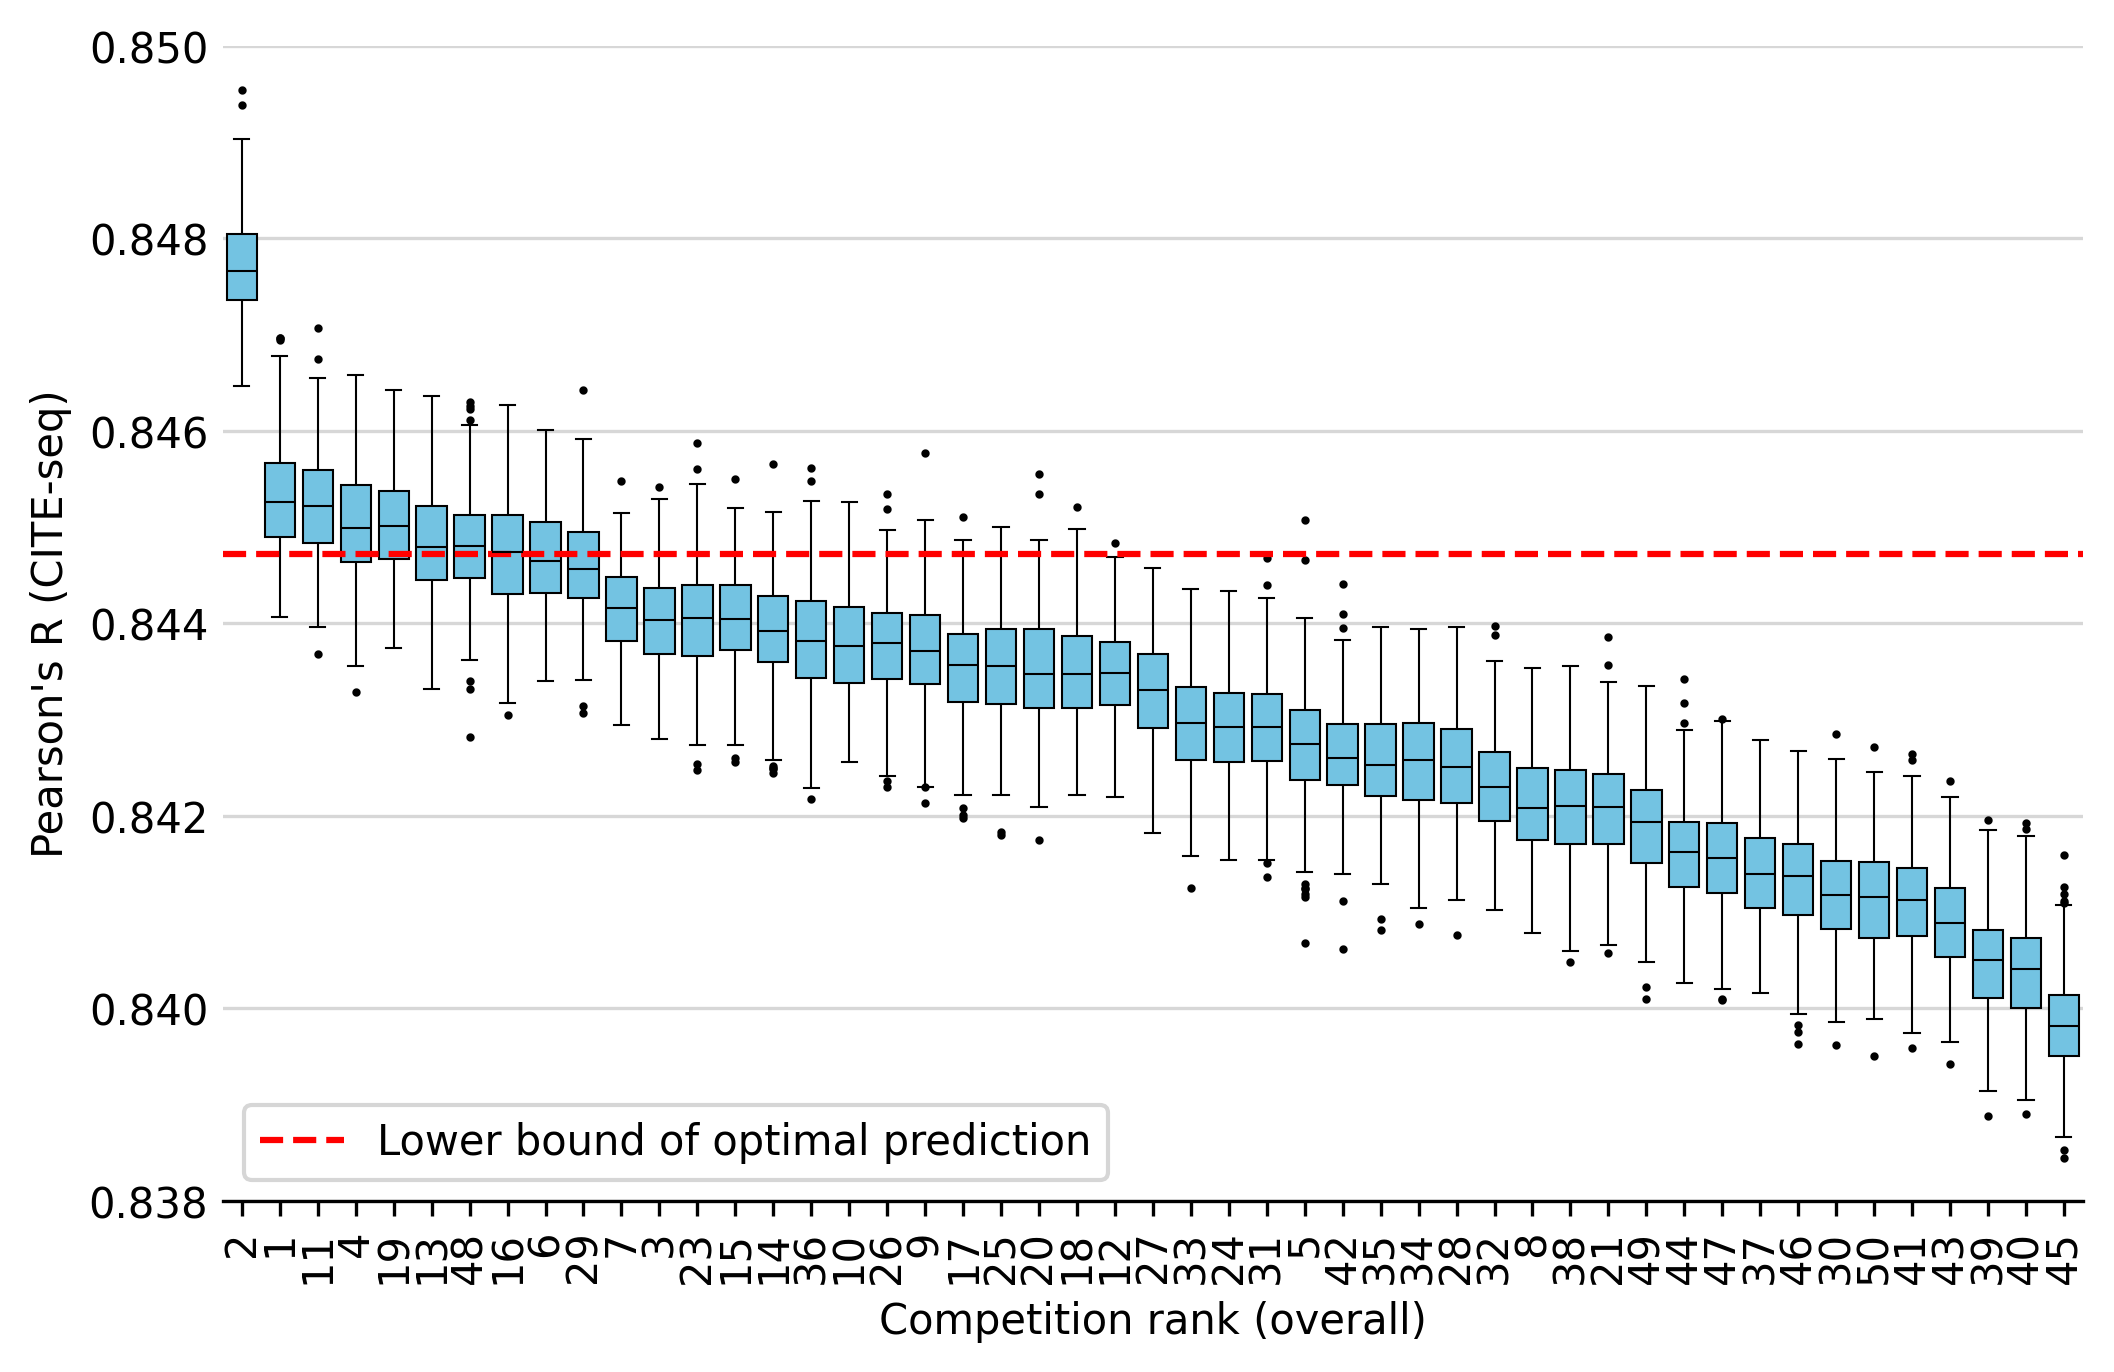

In [45]:
plt.figure(dpi=300, figsize=(8, 5))

col = "private_citeseq"
order = df.groupby("rank").mean().sort_values(by=col, ascending=False).index

sns.boxplot(
    data=df,
    x="rank",
    y=col,
    order=order,
    color=PLOT_COLOR,
    linecolor="black",
    fliersize=1,
    linewidth=0.5
)

plt.axhline(y=citeseq_optimal_lower_bound, color="red", linestyle="--", label="Lower bound of optimal prediction")
plt.legend(loc="lower left")

plt.ylim(0.838, 0.850)
plt.xticks(rotation=90)

# Remove ytick hyphens
plt.gca().yaxis.set_tick_params(length=0)

plt.grid(axis="y", linestyle="-", alpha=0.5)

# Remove border
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.xlabel("Competition rank (overall)")
plt.ylabel("Pearson's R (CITE-seq)")

plt.savefig("../figures/Fig_2_e_citeseq_task_robustness.pdf", bbox_inches="tight")